Tennis Solution
---

## 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import gym
import random
import torch
import numpy as np
from collections import deque
from ddpg_agent import Agent
from itertools import count
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Instantiate the Environment and agent

In [2]:
env = UnityEnvironment(file_name='Tennis.app')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## 3. Examine the State and Action Spaces

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## 4. Take random actions in the environment

In [4]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


## 5. Set training parameters

In [5]:
# Training parameters
num_episodes=5000
episode_scores = []
scores_average_window = 100      
solved_score = 0.5

## 6. Train the agents

In [6]:
#Two agents are initialized
agent_1 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)
agent_2 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)

# loop from num_episodes
for i_episode in range(1, num_episodes+1):

    env_info = env.reset(train_mode=True)[brain_name]     
    states = env_info.vector_observations
    states = np.reshape(states, (1, 48)) # reshape so we can feed both agents states to each agent
    
    # reset each agent for a new episode
    agent_1.reset()
    agent_2.reset()
    agent_scores = np.zeros(num_agents)

    # Execute training
    while True:
        actions_1 = agent_1.act(states, add_noise=True)
        actions_2 = agent_2.act(states, add_noise=True)
        actions = np.concatenate((actions_1, actions_2), axis=0) 
        actions = np.reshape(actions, (1, 4))
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations   # get next state (for each agent)
        next_states = np.reshape(next_states, (1, 48))
        rewards = env_info.rewards                   # get reward (for each agent)
        dones = env_info.local_done                  # see if episode finished
        agent_1.step(states, actions_1, rewards[0], next_states, dones[0])
        agent_2.step(states, actions_2, rewards[1], next_states, dones[1])
        states = next_states
        agent_scores += rewards
        
        if np.any(dones):  # exit loop if episode finished
            break

    # Add episode score
    episode_scores.append(np.max(agent_scores))
    average_score = np.mean(episode_scores[i_episode-min(i_episode,scores_average_window):i_episode+1])

    print('\nEpisode {}\tMax Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, episode_scores[i_episode-1], average_score), end="")
    
    # Save trained  Actor and Critic network weights for agent 1
    an_filename = "checkpoint_actor1.pth"
    torch.save(agent_1.actor_local.state_dict(), an_filename)
    cn_filename = "checkpoint_critic1.pth"
    torch.save(agent_1.critic_local.state_dict(), cn_filename)

    # Save trained  Actor and Critic network weights for agent 2
    an_filename = "checkpoint_actor2.pth"
    torch.save(agent_2.actor_local.state_dict(), an_filename)
    cn_filename = "checkpoint_critic2.pth"
    torch.save(agent_2.critic_local.state_dict(), cn_filename)

    if i_episode > 100 and average_score >= solved_score:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, average_score))
        break


Episode 1	Max Score: 0.00	Average Score: 0.00
Episode 2	Max Score: 0.00	Average Score: 0.00
Episode 3	Max Score: 0.00	Average Score: 0.00
Episode 4	Max Score: 0.00	Average Score: 0.00
Episode 5	Max Score: 0.00	Average Score: 0.00
Episode 6	Max Score: 0.00	Average Score: 0.00
Episode 7	Max Score: 0.00	Average Score: 0.00
Episode 8	Max Score: 0.00	Average Score: 0.00
Episode 9	Max Score: 0.00	Average Score: 0.00
Episode 10	Max Score: 0.00	Average Score: 0.00
Episode 11	Max Score: 0.00	Average Score: 0.00
Episode 12	Max Score: 0.00	Average Score: 0.00
Episode 13	Max Score: 0.00	Average Score: 0.00
Episode 14	Max Score: 0.00	Average Score: 0.00
Episode 15	Max Score: 0.00	Average Score: 0.00
Episode 16	Max Score: 0.00	Average Score: 0.00
Episode 17	Max Score: 0.00	Average Score: 0.00
Episode 18	Max Score: 0.00	Average Score: 0.00
Episode 19	Max Score: 0.00	Average Score: 0.00
Episode 20	Max Score: 0.00	Average Score: 0.00
Episode 21	Max Score: 0.00	Average Score: 0.00
Episode 22	Max Score:

Episode 173	Max Score: 0.00	Average Score: 0.00
Episode 174	Max Score: 0.00	Average Score: 0.00
Episode 175	Max Score: 0.00	Average Score: 0.00
Episode 176	Max Score: 0.00	Average Score: 0.00
Episode 177	Max Score: 0.00	Average Score: 0.00
Episode 178	Max Score: 0.00	Average Score: 0.00
Episode 179	Max Score: 0.00	Average Score: 0.00
Episode 180	Max Score: 0.00	Average Score: 0.00
Episode 181	Max Score: 0.00	Average Score: 0.00
Episode 182	Max Score: 0.00	Average Score: 0.00
Episode 183	Max Score: 0.00	Average Score: 0.00
Episode 184	Max Score: 0.00	Average Score: 0.00
Episode 185	Max Score: 0.00	Average Score: 0.00
Episode 186	Max Score: 0.00	Average Score: 0.00
Episode 187	Max Score: 0.00	Average Score: 0.00
Episode 188	Max Score: 0.00	Average Score: 0.00
Episode 189	Max Score: 0.00	Average Score: 0.00
Episode 190	Max Score: 0.00	Average Score: 0.00
Episode 191	Max Score: 0.00	Average Score: 0.00
Episode 192	Max Score: 0.00	Average Score: 0.00
Episode 193	Max Score: 0.10	Average Scor

Episode 343	Max Score: 0.00	Average Score: 0.02
Episode 344	Max Score: 0.00	Average Score: 0.02
Episode 345	Max Score: 0.00	Average Score: 0.02
Episode 346	Max Score: 0.09	Average Score: 0.02
Episode 347	Max Score: 0.09	Average Score: 0.02
Episode 348	Max Score: 0.09	Average Score: 0.02
Episode 349	Max Score: 0.00	Average Score: 0.02
Episode 350	Max Score: 0.00	Average Score: 0.02
Episode 351	Max Score: 0.00	Average Score: 0.02
Episode 352	Max Score: 0.09	Average Score: 0.02
Episode 353	Max Score: 0.10	Average Score: 0.02
Episode 354	Max Score: 0.00	Average Score: 0.02
Episode 355	Max Score: 0.10	Average Score: 0.02
Episode 356	Max Score: 0.10	Average Score: 0.03
Episode 357	Max Score: 0.00	Average Score: 0.03
Episode 358	Max Score: 0.00	Average Score: 0.03
Episode 359	Max Score: 0.00	Average Score: 0.03
Episode 360	Max Score: 0.10	Average Score: 0.03
Episode 361	Max Score: 0.09	Average Score: 0.03
Episode 362	Max Score: 0.00	Average Score: 0.03
Episode 363	Max Score: 0.09	Average Scor

Episode 513	Max Score: 0.00	Average Score: 0.03
Episode 514	Max Score: 0.00	Average Score: 0.03
Episode 515	Max Score: 0.00	Average Score: 0.03
Episode 516	Max Score: 0.00	Average Score: 0.03
Episode 517	Max Score: 0.00	Average Score: 0.03
Episode 518	Max Score: 0.00	Average Score: 0.03
Episode 519	Max Score: 0.09	Average Score: 0.03
Episode 520	Max Score: 0.09	Average Score: 0.03
Episode 521	Max Score: 0.09	Average Score: 0.04
Episode 522	Max Score: 0.00	Average Score: 0.04
Episode 523	Max Score: 0.09	Average Score: 0.04
Episode 524	Max Score: 0.00	Average Score: 0.04
Episode 525	Max Score: 0.09	Average Score: 0.04
Episode 526	Max Score: 0.00	Average Score: 0.04
Episode 527	Max Score: 0.00	Average Score: 0.04
Episode 528	Max Score: 0.00	Average Score: 0.04
Episode 529	Max Score: 0.09	Average Score: 0.04
Episode 530	Max Score: 0.09	Average Score: 0.04
Episode 531	Max Score: 0.09	Average Score: 0.04
Episode 532	Max Score: 0.00	Average Score: 0.04
Episode 533	Max Score: 0.09	Average Scor

Episode 683	Max Score: 0.09	Average Score: 0.04
Episode 684	Max Score: 0.00	Average Score: 0.04
Episode 685	Max Score: 0.09	Average Score: 0.04
Episode 686	Max Score: 0.09	Average Score: 0.04
Episode 687	Max Score: 0.00	Average Score: 0.04
Episode 688	Max Score: 0.09	Average Score: 0.04
Episode 689	Max Score: 0.09	Average Score: 0.04
Episode 690	Max Score: 0.00	Average Score: 0.04
Episode 691	Max Score: 0.00	Average Score: 0.04
Episode 692	Max Score: 0.00	Average Score: 0.04
Episode 693	Max Score: 0.00	Average Score: 0.04
Episode 694	Max Score: 0.00	Average Score: 0.04
Episode 695	Max Score: 0.00	Average Score: 0.04
Episode 696	Max Score: 0.09	Average Score: 0.04
Episode 697	Max Score: 0.09	Average Score: 0.04
Episode 698	Max Score: 0.09	Average Score: 0.04
Episode 699	Max Score: 0.09	Average Score: 0.04
Episode 700	Max Score: 0.00	Average Score: 0.04
Episode 701	Max Score: 0.00	Average Score: 0.04
Episode 702	Max Score: 0.00	Average Score: 0.04
Episode 703	Max Score: 0.00	Average Scor

Episode 853	Max Score: 0.10	Average Score: 0.05
Episode 854	Max Score: 0.10	Average Score: 0.05
Episode 855	Max Score: 0.10	Average Score: 0.05
Episode 856	Max Score: 0.00	Average Score: 0.05
Episode 857	Max Score: 0.10	Average Score: 0.05
Episode 858	Max Score: 0.00	Average Score: 0.05
Episode 859	Max Score: 0.00	Average Score: 0.05
Episode 860	Max Score: 0.00	Average Score: 0.05
Episode 861	Max Score: 0.10	Average Score: 0.05
Episode 862	Max Score: 0.00	Average Score: 0.05
Episode 863	Max Score: 0.10	Average Score: 0.05
Episode 864	Max Score: 0.09	Average Score: 0.05
Episode 865	Max Score: 0.19	Average Score: 0.05
Episode 866	Max Score: 0.10	Average Score: 0.05
Episode 867	Max Score: 0.00	Average Score: 0.05
Episode 868	Max Score: 0.19	Average Score: 0.06
Episode 869	Max Score: 0.00	Average Score: 0.06
Episode 870	Max Score: 0.10	Average Score: 0.06
Episode 871	Max Score: 0.09	Average Score: 0.06
Episode 872	Max Score: 0.09	Average Score: 0.06
Episode 873	Max Score: 0.00	Average Scor

Episode 1023	Max Score: 0.00	Average Score: 0.05
Episode 1024	Max Score: 0.10	Average Score: 0.05
Episode 1025	Max Score: 0.00	Average Score: 0.05
Episode 1026	Max Score: 0.10	Average Score: 0.05
Episode 1027	Max Score: 0.00	Average Score: 0.05
Episode 1028	Max Score: 0.10	Average Score: 0.05
Episode 1029	Max Score: 0.00	Average Score: 0.05
Episode 1030	Max Score: 0.00	Average Score: 0.05
Episode 1031	Max Score: 0.09	Average Score: 0.05
Episode 1032	Max Score: 0.10	Average Score: 0.05
Episode 1033	Max Score: 0.10	Average Score: 0.05
Episode 1034	Max Score: 0.09	Average Score: 0.05
Episode 1035	Max Score: 0.10	Average Score: 0.05
Episode 1036	Max Score: 0.30	Average Score: 0.06
Episode 1037	Max Score: 0.10	Average Score: 0.06
Episode 1038	Max Score: 0.10	Average Score: 0.06
Episode 1039	Max Score: 0.10	Average Score: 0.06
Episode 1040	Max Score: 0.10	Average Score: 0.06
Episode 1041	Max Score: 0.00	Average Score: 0.06
Episode 1042	Max Score: 0.09	Average Score: 0.06
Episode 1043	Max Sco

Episode 1190	Max Score: 0.10	Average Score: 0.08
Episode 1191	Max Score: 0.00	Average Score: 0.08
Episode 1192	Max Score: 0.10	Average Score: 0.08
Episode 1193	Max Score: 0.09	Average Score: 0.08
Episode 1194	Max Score: 0.09	Average Score: 0.08
Episode 1195	Max Score: 0.10	Average Score: 0.08
Episode 1196	Max Score: 0.10	Average Score: 0.08
Episode 1197	Max Score: 0.10	Average Score: 0.08
Episode 1198	Max Score: 0.00	Average Score: 0.08
Episode 1199	Max Score: 0.00	Average Score: 0.08
Episode 1200	Max Score: 0.00	Average Score: 0.08
Episode 1201	Max Score: 0.00	Average Score: 0.07
Episode 1202	Max Score: 0.10	Average Score: 0.08
Episode 1203	Max Score: 0.10	Average Score: 0.08
Episode 1204	Max Score: 0.00	Average Score: 0.07
Episode 1205	Max Score: 0.00	Average Score: 0.07
Episode 1206	Max Score: 0.10	Average Score: 0.07
Episode 1207	Max Score: 0.00	Average Score: 0.07
Episode 1208	Max Score: 0.10	Average Score: 0.08
Episode 1209	Max Score: 0.10	Average Score: 0.08
Episode 1210	Max Sco

Episode 1357	Max Score: 0.10	Average Score: 0.09
Episode 1358	Max Score: 0.10	Average Score: 0.09
Episode 1359	Max Score: 0.09	Average Score: 0.09
Episode 1360	Max Score: 0.10	Average Score: 0.09
Episode 1361	Max Score: 0.09	Average Score: 0.09
Episode 1362	Max Score: 0.00	Average Score: 0.09
Episode 1363	Max Score: 0.10	Average Score: 0.09
Episode 1364	Max Score: 0.10	Average Score: 0.09
Episode 1365	Max Score: 0.10	Average Score: 0.09
Episode 1366	Max Score: 0.10	Average Score: 0.09
Episode 1367	Max Score: 0.10	Average Score: 0.09
Episode 1368	Max Score: 0.00	Average Score: 0.09
Episode 1369	Max Score: 0.10	Average Score: 0.09
Episode 1370	Max Score: 0.10	Average Score: 0.09
Episode 1371	Max Score: 0.09	Average Score: 0.09
Episode 1372	Max Score: 0.10	Average Score: 0.09
Episode 1373	Max Score: 0.10	Average Score: 0.09
Episode 1374	Max Score: 0.10	Average Score: 0.09
Episode 1375	Max Score: 0.09	Average Score: 0.09
Episode 1376	Max Score: 0.00	Average Score: 0.09
Episode 1377	Max Sco

Episode 1524	Max Score: 2.60	Average Score: 0.24
Episode 1525	Max Score: 0.10	Average Score: 0.24
Episode 1526	Max Score: 0.10	Average Score: 0.24
Episode 1527	Max Score: 1.00	Average Score: 0.25
Episode 1528	Max Score: 0.10	Average Score: 0.24
Episode 1529	Max Score: 0.10	Average Score: 0.24
Episode 1530	Max Score: 0.10	Average Score: 0.24
Episode 1531	Max Score: 0.10	Average Score: 0.24
Episode 1532	Max Score: 0.30	Average Score: 0.24
Episode 1533	Max Score: 0.30	Average Score: 0.25
Episode 1534	Max Score: 0.40	Average Score: 0.25
Episode 1535	Max Score: 0.50	Average Score: 0.25
Episode 1536	Max Score: 0.10	Average Score: 0.25
Episode 1537	Max Score: 0.30	Average Score: 0.25
Episode 1538	Max Score: 0.30	Average Score: 0.26
Episode 1539	Max Score: 0.10	Average Score: 0.25
Episode 1540	Max Score: 0.10	Average Score: 0.25
Episode 1541	Max Score: 0.40	Average Score: 0.26
Episode 1542	Max Score: 0.80	Average Score: 0.26
Episode 1543	Max Score: 0.80	Average Score: 0.27
Episode 1544	Max Sco

## 7. Plot the scores

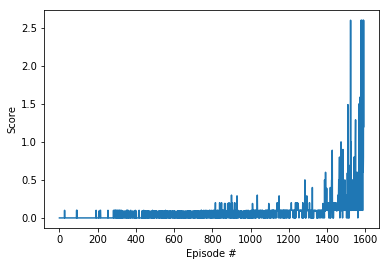

In [7]:
fig = plt.figure()
plt.plot(np.arange(len(episode_scores)), episode_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 8. Test agent

In [8]:
num_episodes=2

#Initialize agents
agent_1 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)
agent_2 = Agent(state_size=48, action_size=action_size, num_agents=1, random_seed=0)

# Load trained model
agent_1.actor_local.load_state_dict(torch.load('checkpoint_actor1.pth'))
agent_1.critic_local.load_state_dict(torch.load('checkpoint_critic1.pth'))
agent_2.actor_local.load_state_dict(torch.load('checkpoint_actor2.pth'))
agent_2.critic_local.load_state_dict(torch.load('checkpoint_critic2.pth'))

env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
print('\nNumber of Agents: ', num_agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]
print('\nSize of State: ', state_size)

# Execute episodes
for i_episode in range(1, num_episodes+1):

    env_info = env.reset(train_mode=False)[brain_name]     
    states = env_info.vector_observations
    states = np.reshape(states, (1, 48))
    agent_1.reset()
    agent_2.reset()
    agent_scores = np.zeros(num_agents)

    while True:
        actions_1 = agent_1.act(states, add_noise=False)
        actions_2 = agent_2.act(states, add_noise=False)
        actions = np.concatenate((actions_1, actions_2), axis=0) 
        actions = np.reshape(actions, (1, 4))
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations   
        next_states = np.reshape(next_states, (1, 48))
        rewards = env_info.rewards                   
        dones = env_info.local_done                  
        states = next_states
        agent_scores += rewards
        if np.any(dones):
            break
            
    print('\nEpisode {}\tAgent1 Score: {:.2f}\tAgent2 Score: {:.2f}'.format(i_episode, agent_scores[0], agent_scores[1], end=""))



Number of Agents:  2

Size of State:  24

Episode 1	Agent1 Score: 0.50	Agent2 Score: 0.49

Episode 2	Agent1 Score: 2.60	Agent2 Score: 2.60


## 9. Close the environment

In [9]:
env.close()